# problem statement

The following data is provided to as by a bank that show their customers who are eligible to receive loans and those who are not using different factors. They want us to create the best model that they can use to determine those who are eligible and those that are not.

# Data Understanding

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as pyplot
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# import the Dataset loan_dataset
loan_df = pd.read_csv("/content/loan_dataset.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# check for missing values
loan_df.isnull().sum().sort_values(ascending= False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning

Repalcing the missing values in the categorical columns(which are binary) with MODE and the numerical columns(LoanAmount) with the MEAN

In [ ]:
#Filling the missing values with mode and mean values
loan_df['Gender'] = loan_df['Gender'].fillna( loan_df['Gender'].dropna().mode().values[0])
loan_df['Married'] = loan_df['Married'].fillna( loan_df['Married'].dropna().mode().values[0])
loan_df['Dependents'] = loan_df['Dependents']. fillna(loan_df['Married'].dropna().mode().values[0])
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna( loan_df['Self_Employed'].dropna().mode().values[0])
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna( loan_df['Loan_Amount_Term'].dropna().mode().values[0])
loan_df['Credit_History'] = loan_df['Credit_History'].fillna( loan_df['Credit_History'].dropna().mode().values[0])
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna( loan_df['LoanAmount'].dropna().mean())

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#getting the unique values from each categorical columns
print(set(loan_df['Gender'].values.tolist()))
print(set(loan_df['Married'].values.tolist()))
print(set(loan_df['Dependents'].values.tolist()))
print(set(loan_df['Education'].values.tolist()))
print(set(loan_df['Self_Employed'].values.tolist()))
print(set(loan_df['Property_Area'].values.tolist()))
print(set(loan_df['Loan_Status'].values.tolist()))

{'Female', 'Male'}
{'Yes', 'No'}
{'2', '1', '3+', 'Yes', '0'}
{'Not Graduate', 'Graduate'}
{'Yes', 'No'}
{'Rural', 'Urban', 'Semiurban'}
{'Y', 'N'}


In [ ]:
# Encoding the categorical columns
#loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'Y':1, 'N':0})
#loan_df = pd.get_dummies(loan_df, columns = ['Gender', 'Dependents', 'Married', 'Education','Self_Employed', 'Property_Area'])

In [ ]:
# changing float columns into integers
#loan_df['LoanAmount'] = loan_df['LoanAmount'].astype(int)
#loan_df['CoapplicantIncome'] = loan_df['CoapplicantIncome'].astype(int)
#loan_df['Credit_History'] = loan_df['Credit_History'].astype(int)
#loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].astype(int)
#loan_df['ApplicantIncome'] = loan_df['ApplicantIncome'].astype(int)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (loan_df.dtypes == 'object')
for col in list(obj[obj].index):
    loan_df[col] = label_encoder.fit_transform(loan_df[col])


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (loan_df.dtypes == 'float64')
for col in list(obj[obj].index):
  loan_df[col] = label_encoder.fit_transform(loan_df[col])


In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            614 non-null    int64
 1   Gender             614 non-null    int64
 2   Married            614 non-null    int64
 3   Dependents         614 non-null    int64
 4   Education          614 non-null    int64
 5   Self_Employed      614 non-null    int64
 6   ApplicantIncome    614 non-null    int64
 7   CoapplicantIncome  614 non-null    int64
 8   LoanAmount         614 non-null    int64
 9   Loan_Amount_Term   614 non-null    int64
 10  Credit_History     614 non-null    int64
 11  Property_Area      614 non-null    int64
 12  Loan_Status        614 non-null    int64
dtypes: int64(13)
memory usage: 62.5 KB


<Axes: >

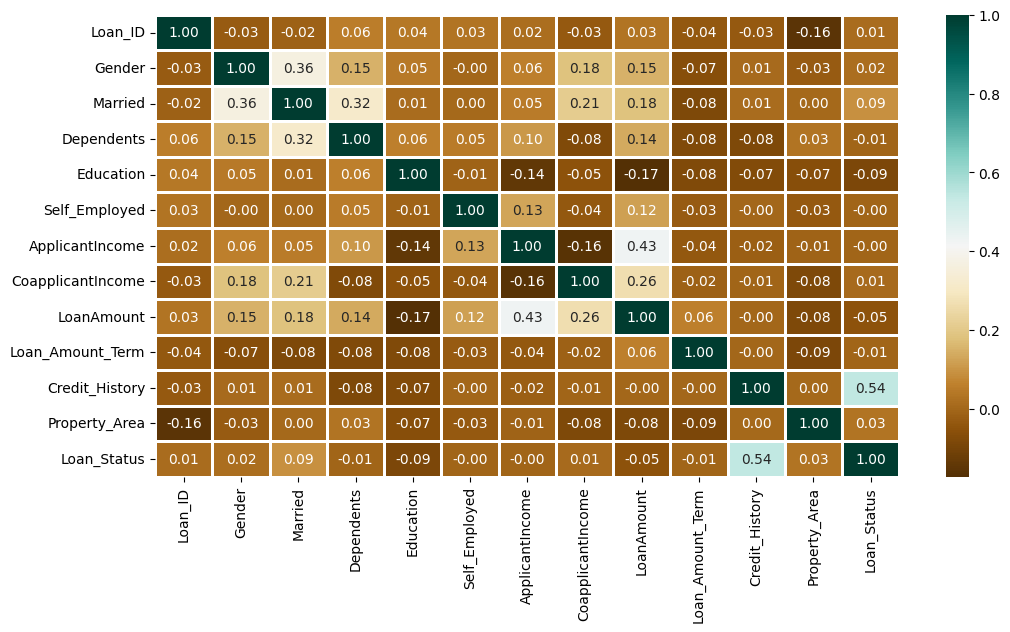

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(loan_df.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)


In [ ]:
#print(loan_df['Loan_Status'].value_counts())
#print(loan_df['Gender'].value_counts())

In [ ]:
# Standardizing the columns
Scaler = StandardScaler()
columns = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','CoapplicantIncome']
loan_df[columns] = Scaler.fit_transform(loan_df[columns])

In [ ]:
# drop the Loan_ID column
loan_df.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# data training

In [ ]:
loan_df.shape

(614, 12)

In [ ]:
# splitting the data
X = loan_df.drop(['Loan_Status'], axis = 1)
Y = loan_df['Loan_Status']

X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [ ]:
X = loan_df.drop(['Loan_Status'],axis=1)
Y = loan_df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

*support vector machine model*

In [ ]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, Y)

SVC(gamma=0.5)

In [ ]:
#from sklearn.metrics import roc_auc_score
#model = SVC(kernel='rbf')
#model.fit(X, Y)
#X_val = scaler.transform(X_val)
#print('Training Accuracy : ', metrics.roc_auc_score(Y, svm.predict(X)))
#print('Validation Accuracy : ', metrics.roc_auc_score(Y_test, svm.predict(X_test)))
#print()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 97.55434782608695
Accuracy score of  KNeighborsClassifier = 82.88043478260869
Accuracy score of  SVC = 83.15217391304348
Accuracy score of  LogisticRegression = 82.6086956521739


In [ ]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_test)
	print("Accuracy score of ",
		clf.__class__.__name__,"=",
		100*metrics.accuracy_score(Y_test,
									Y_pred))


Accuracy score of  RandomForestClassifier = 75.60975609756098
Accuracy score of  KNeighborsClassifier = 68.29268292682927
Accuracy score of  SVC = 77.23577235772358
Accuracy score of  LogisticRegression = 78.45528455284553


logistic regression has the best accuracy score on the prediction compared to the rest of the algorithms